<a href="https://www.kaggle.com/code/pragyamukherjee/titanic-data-analysis?scriptVersionId=154357624" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Training dataset

In [2]:
# Titanic train dataset is loaded.
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Testing dataset

In [3]:
# Titanic test dataset is loaded.
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Example submission file

In [4]:
# Titanic submission dataset is loaded.
sub_data = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
sub_data.head(5)

Y_test = sub_data.iloc[:,-1]
Y_test # we need the expected y values for finding the accuracy score later

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# **Data Analysis and visualization**

In [5]:
# Get the column names
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
# The target variable
print(train_data['Survived'].unique())

[0 1]


In [7]:
# The Passanger's Class types
print(train_data['Pclass'].unique())

[3 1 2]


In [8]:
print(train_data['Embarked'].unique())

['S' 'C' 'Q' nan]


In [9]:
# Check the null values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Understanding the Column attributes**

**PassengerId** - id of each passenger

**Survived** - Has 2 values - 0 and 1:

*  Survived - 1
*  Not Survived - 0

**Pclass** - Passenger's class:

* Upper Class - 1st 
* Middle Class - 2nd
* Lower Class - 3rd

**Name** - Passenger's name

**Sex** - Passenger's Gender 

**Age** - Passenger's Age in years

**SibSp** - Passenger's siblings and spouses

**Parch** - Passenger's parents and children

**Ticket** - Passenger's ticket number

**Fare** - Passenger's ticket price

**Cabin** - Passenger's cabin number

**Embarked** - Port of entry:

* C - Cherbourg
* Q - Queenstown
* S - Southampton

In [10]:
# Total females
totalFemales = len(train_data[train_data.Sex == 'female'])
# Total males
totalMales = len(train_data[train_data.Sex == 'male'])

# We added total 1s in the 'Survived' col each of female and male category
femalesSurvived = train_data.loc[train_data.Sex == 'female']['Survived'].values.sum()
malesSurvived = train_data.loc[train_data.Sex == 'male']['Survived'].values.sum()

print('Total females survived: ', femalesSurvived, '/', totalFemales, 'i.e', round(femalesSurvived*100/totalFemales,2), '% survival rate')
print('Total males survived: ', malesSurvived, '/', totalMales, 'i.e', round(malesSurvived*100/totalMales,2), '% survival rate')


Total females survived:  233 / 314 i.e 74.2 % survival rate
Total males survived:  109 / 577 i.e 18.89 % survival rate


The above mathematical calculations show that rate of female survival was more than that of male survival.

Hence the '*Sex*' attribute plays an importance in the analysis.

Text(0.5, 1.0, 'Sex-wise survival rate')

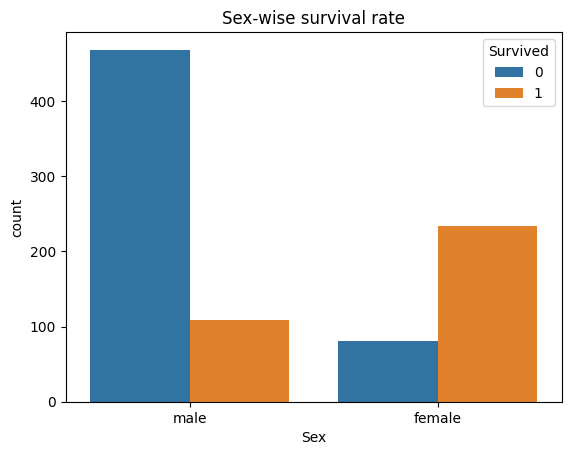

In [11]:
from matplotlib import pyplot as plt
# Some visual representations
import seaborn as sns

sns.countplot(train_data, x= "Sex", hue='Survived')
plt.title("Sex-wise survival rate")

Text(0.5, 1.0, 'Embarked-wise survival rate')

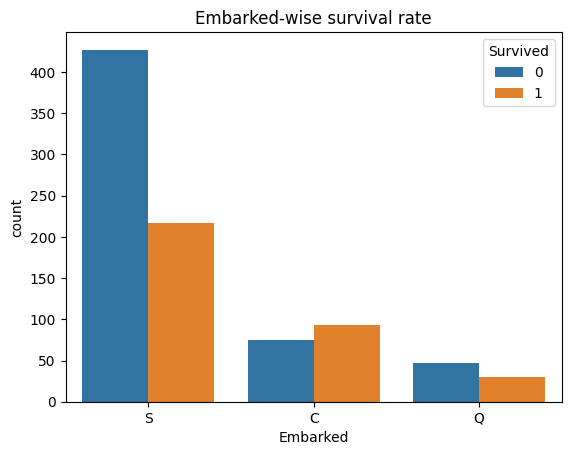

In [12]:
sns.countplot(train_data, x= "Embarked", hue='Survived')
plt.title("Embarked-wise survival rate")

Text(0.5, 1.0, 'PClass-wise survival rate')

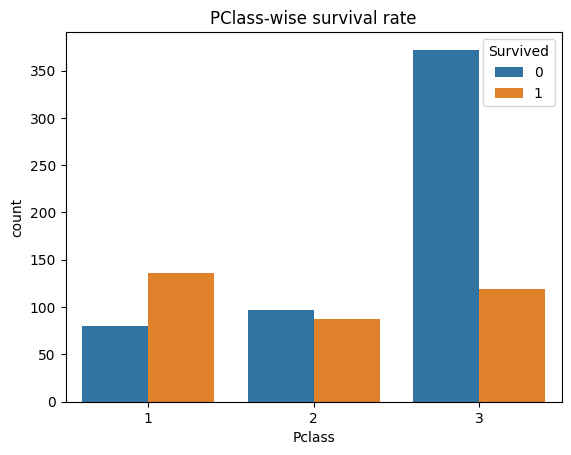

In [13]:
sns.countplot(train_data, x= "Pclass", hue='Survived')
plt.title("PClass-wise survival rate")

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


# pre-process the data
for data in [train_data, test_data]:
    data.drop(["Name","Cabin", "Ticket"], axis = "columns", inplace = True)
    data["Age"].fillna(value=data["Age"].mean(), inplace=True)
    data["Fare"].fillna(value=data["Fare"].median(), inplace=True)
    data["Embarked"].fillna(value=data["Embarked"].mode()[0], inplace=True)
    label = LabelEncoder()
    data['Sex'] = label.fit_transform(data['Sex'])
    data['Embarked'] = label.fit_transform(data['Embarked'])
    # Scale the data

    minmaxScaler = MinMaxScaler()
    data = minmaxScaler.fit_transform(data)

In [15]:
# Check if there are any null values present
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [16]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [17]:
X_train = train_data.iloc[:,2:]
Y_train = train_data.iloc[:,1:2].to_numpy().reshape((-1, 1))
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [18]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [19]:
# Y_train

In [20]:
X_test = test_data.iloc[:,1:]
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


# Classification Models

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB  

# model objects
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 6, random_state=0)
lr_model = LogisticRegression(max_iter=10000)
gb_model = GradientBoostingClassifier()
nb_model = GaussianNB()
svc_model = SVC()

# Train Test Split Evaluation

In [22]:
# The following code section will find best model

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score


x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.33, random_state=42)

# validation model training

rf_model.fit(x_train, y_train.ravel())
lr_model.fit(x_train, y_train.ravel())
gb_model.fit(x_train, y_train.ravel())
nb_model.fit(x_train, y_train.ravel())
svc_model.fit(x_train, y_train.ravel())


# predict and get score

rf_predict = rf_model.predict(x_test)

lr_predict = lr_model.predict(x_test)

gb_predict = gb_model.predict(x_test)

nb_predict = nb_model.predict(x_test)

svc_predict = svc_model.predict(x_test)

print("Accuracy Scores after splitting the dataset for training and testing:")

print("Random forest {:0.2f}%".format(accuracy_score(y_test, rf_predict)*100))
print("Logistic Regression {:0.2f}%".format(accuracy_score(y_test, lr_predict)*100))
print("Gradient Boost {:0.2f}%".format(accuracy_score(y_test, gb_predict)*100))
print("Naive Bayes {:0.2f}%".format(accuracy_score(y_test, nb_predict)*100))
print("Support Vector Classifier {:0.2f}%".format(accuracy_score(y_test, svc_predict)*100))

Accuracy Scores after splitting the dataset for training and testing:
Random forest 83.05%
Logistic Regression 81.69%
Gradient Boost 81.69%
Naive Bayes 80.34%
Support Vector Classifier 66.44%


# Best Model Selection

In [23]:
# Final training with the model with highest accuracy, i.e Random forest 83.05%

rf_model.fit(X_train, Y_train.ravel())


RandomForestClassifier(max_depth=6, random_state=0)

# Model Prediction

In [24]:
# predict and get score

rf_predict = gb_model.predict(X_test)
rf_predict = np.array(rf_predict)

# Upload predictions

In [25]:
# Upload submission

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': rf_predict})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# View the submitted predictions

In [26]:
# Titanic submission dataset is loaded.
submitted_data = pd.read_csv("/kaggle/working/submission.csv")
submitted_data.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
